In [28]:
using Pkg, CairoMakie, LaTeXStrings, LinearAlgebra, FFTW
Pkg.activate("/Users/jiyong/.juliaenv/image")
using OpenCV, TestImages
include("cvext.jl")

  Activating project at `~/.juliaenv/image`


cvSize (generic function with 1 method)

In [12]:

function cvConvertTo(mat::OpenCV.Mat, t::T) where T<:Type
    return cv.Mat(convert.(t, mat.data))
end

cvConvertTo (generic function with 1 method)

In [33]:
img0= img2mat(testimage("cameraman.tif"));
img1 = cvConvertTo(img0, Float32)
img1a = mat2arr(img1)
ft1 = cv.dft(img1, flags=cv.DFT_COMPLEX_OUTPUT);


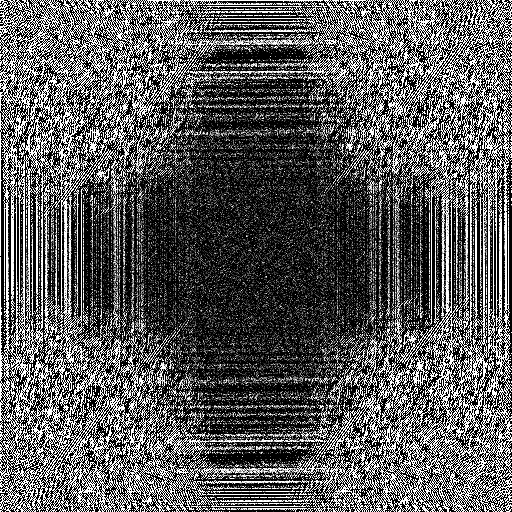

In [25]:
cv.Mat(ft1.data[1:1,:,:])

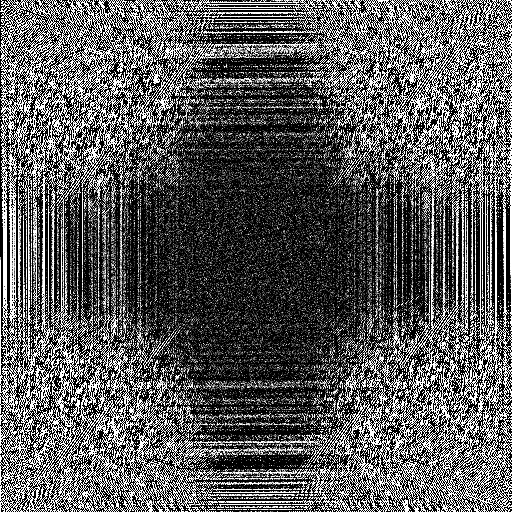

In [26]:
cv.Mat(ft1.data[2:2,:,:])

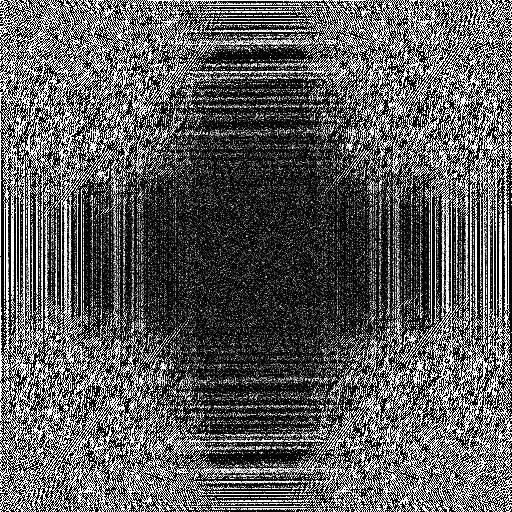

In [58]:
cc = fft(img1a)[:,:,1]
arr2mat(real(cc))

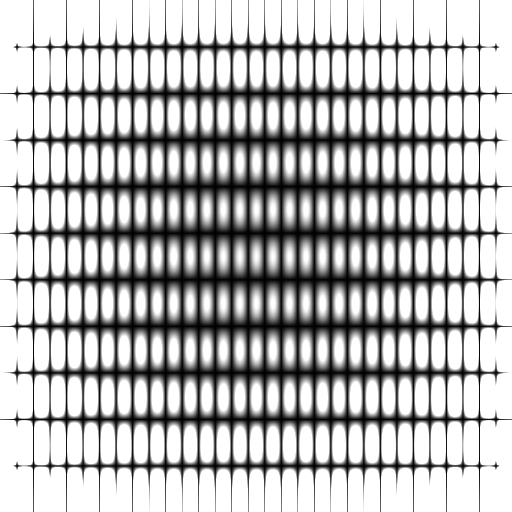

In [83]:
X = zeros(UInt8, (512, 512))
X[(256-5):(256+5), (256-15):(256+15)].= 255
img1 = arr2mat(X)
img1f = cvConvertTo(img1, Float32)
img2 = cv.dft(img1f, flags=cv.DFT_COMPLEX_OUTPUT);
img3 = cv.Mat(@. sqrt(img2[1:1, :, :]^2 + img2[2:2,:,:]^2) )


In [86]:
img2[1:1,:,:]

1×512×512 Array{Float32, 3}:
[:, :, 1] =
 86955.0  -86425.6  84849.3  -82260.9  …  -82260.9  84849.3  -86425.6

[:, :, 2] =
 -86883.0  86341.0  -84753.5  82155.6  …  82229.9  -84804.5  86367.1

[:, :, 3] =
 86667.2  -86113.6  84517.5  -81914.5  …  -82062.8  84619.4  -86165.5

;;; … 

[:, :, 510] =
 -86308.4  85821.7  -84294.4  81760.0  …  81538.4  -84142.1  85744.2

[:, :, 511] =
 86667.2  -86165.5  84619.4  -82062.8  …  -81914.5  84517.5  -86113.6

[:, :, 512] =
 -86883.0  86367.1  -84804.5  82229.9  …  82155.6  -84753.5  86341.0

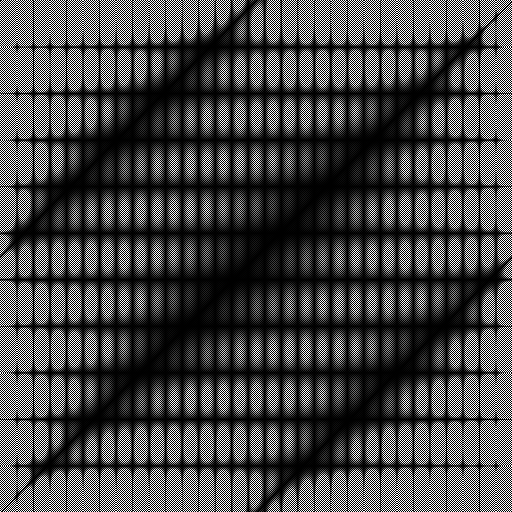

In [85]:
cv.Mat(img2[2:2,:,:])

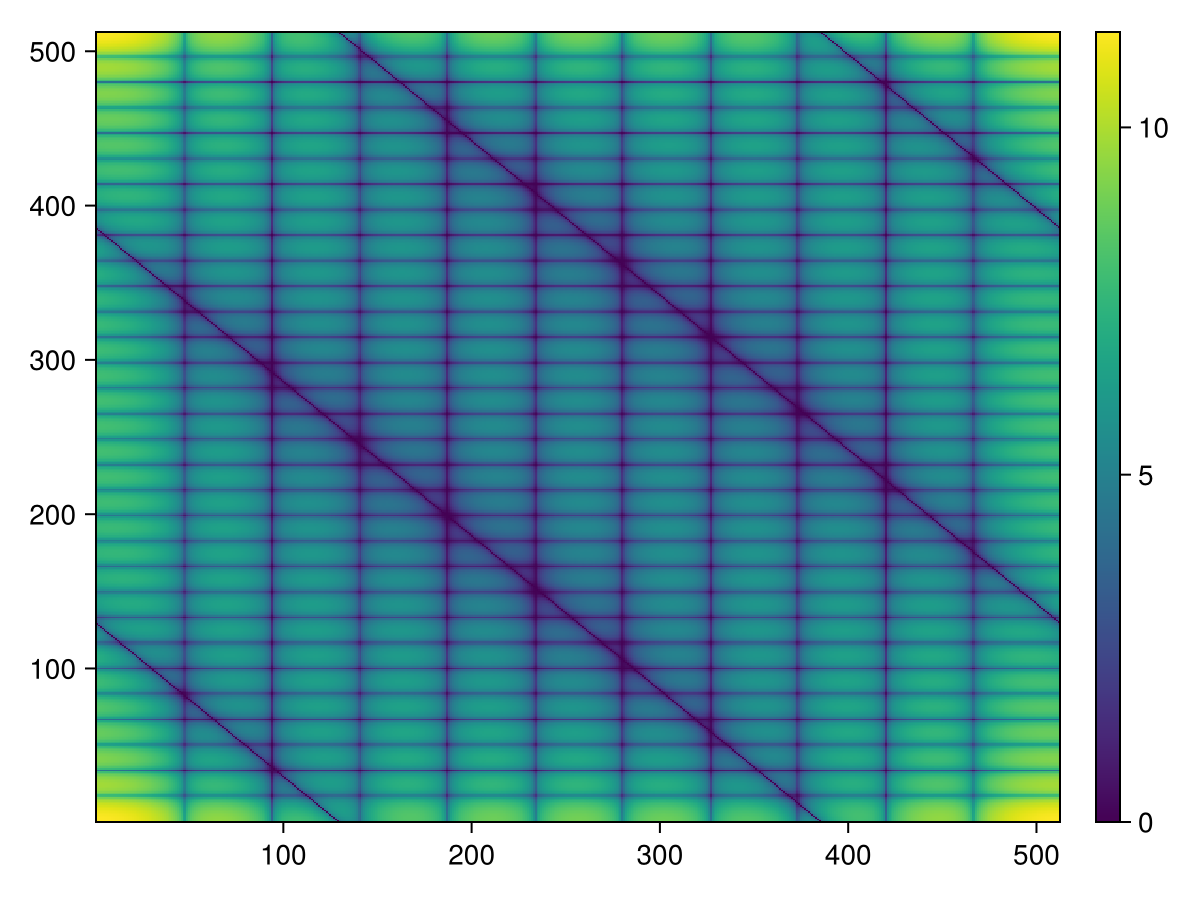

In [103]:

fig, ax, hm = heatmap(log.(1.0 .+ abs.(real(fft(X)))))
Colorbar(fig[:, end+1], hm)
fig

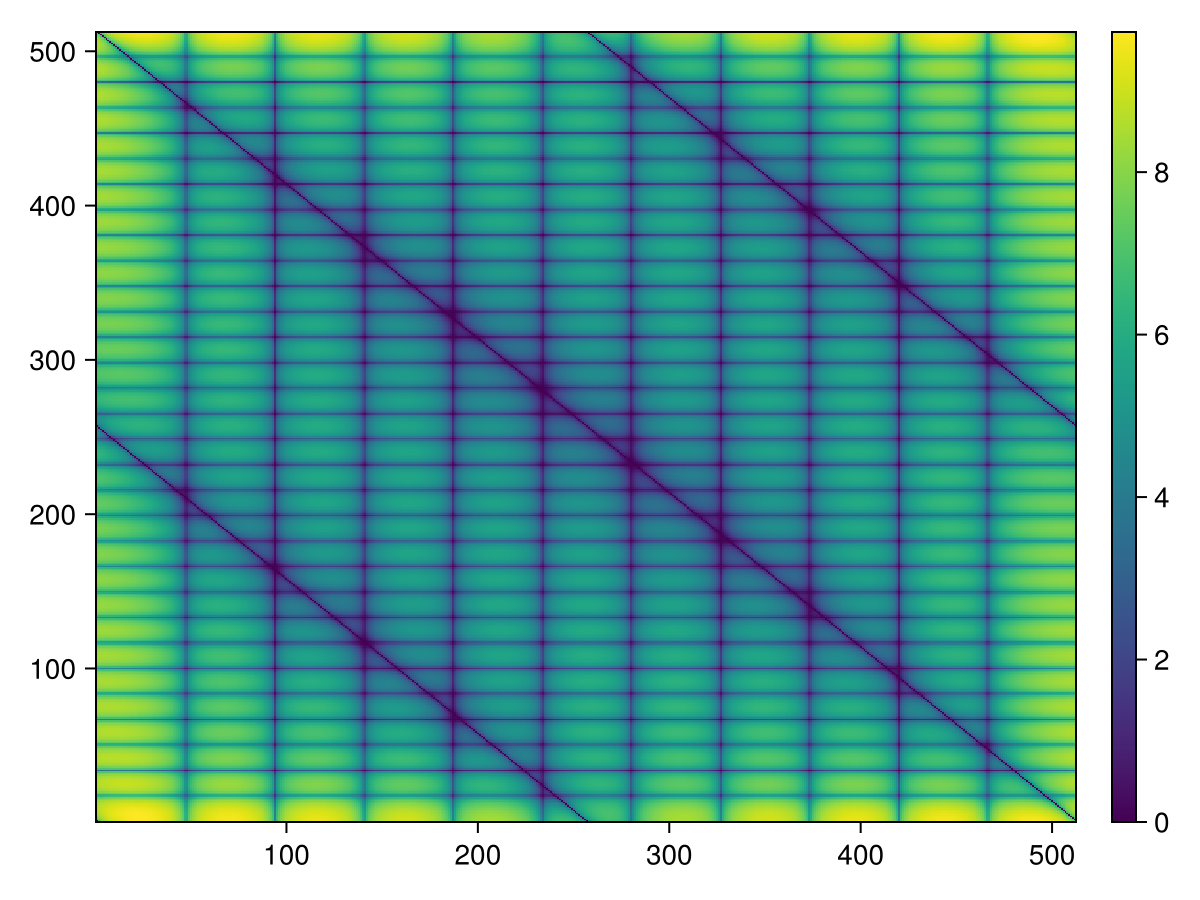

In [104]:

fig, ax, hm = heatmap(log.(1.0 .+ abs.(imag(fft(X)))))
Colorbar(fig[:, end+1], hm)
fig